In [10]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.feature_extraction.text import TfidfVectorizer
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Load the data
listings = pd.read_csv('data/listings.csv.gz')
calendar = pd.read_csv('data/calendar.csv.gz')
reviews = pd.read_csv('data/reviews.csv.gz')

print("All data loaded successfully!")

# ===== EXPLORE LISTINGS =====
print("\n" + "=" * 70)
print("LISTINGS DATA STRUCTURE")
print("=" * 70)
print("\nColumn Names:")
print(listings.columns.tolist())
print("\n" + "=" * 70)
print("FIRST 5 ROWS:")
print("=" * 70)
print(listings.head())


All data loaded successfully!

LISTINGS DATA STRUCTURE

Column Names:
['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability

In [11]:
# ===== MISSING VALUES ANALYSIS =====
print("\n" + "=" * 70)
print("MISSING VALUES IN LISTINGS")
print("=" * 70)

missing = listings.isnull().sum()
missing_pct = (missing / len(listings) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing_Count': missing, 
    'Missing_Percent': missing_pct
}).sort_values('Missing_Percent', ascending=False)

# Show only columns with missing values
print("\nColumns with missing data:")
print(missing_df[missing_df['Missing_Count'] > 0].head(20))

# Summary
total_missing = missing.sum()
print(f"\nTotal missing values: {total_missing:,}")
print(f"Columns with no missing values: {(missing == 0).sum()}")



MISSING VALUES IN LISTINGS

Columns with missing data:
                              Missing_Count  Missing_Percent
neighbourhood_group_cleansed          96871           100.00
calendar_updated                      96871           100.00
license                               96871           100.00
neighbourhood                         55662            57.46
neighborhood_overview                 55663            57.46
host_neighbourhood                    51021            52.67
host_about                            47038            48.56
beds                                  34920            36.05
estimated_revenue_l365d               34908            36.04
price                                 34908            36.04
bathrooms                             34846            35.97
host_response_rate                    31707            32.73
host_response_time                    31707            32.73
host_acceptance_rate                  27760            28.66
review_scores_location       


PRICE ANALYSIS

Price Statistics:
count    6.196300e+04
mean     2.299170e+02
std      4.437589e+03
min      7.000000e+00
25%      7.700000e+01
50%      1.350000e+02
75%      2.210000e+02
max      1.085147e+06
Name: price_numeric, dtype: float64

1st percentile: $30.00
99th percentile: $1100.00


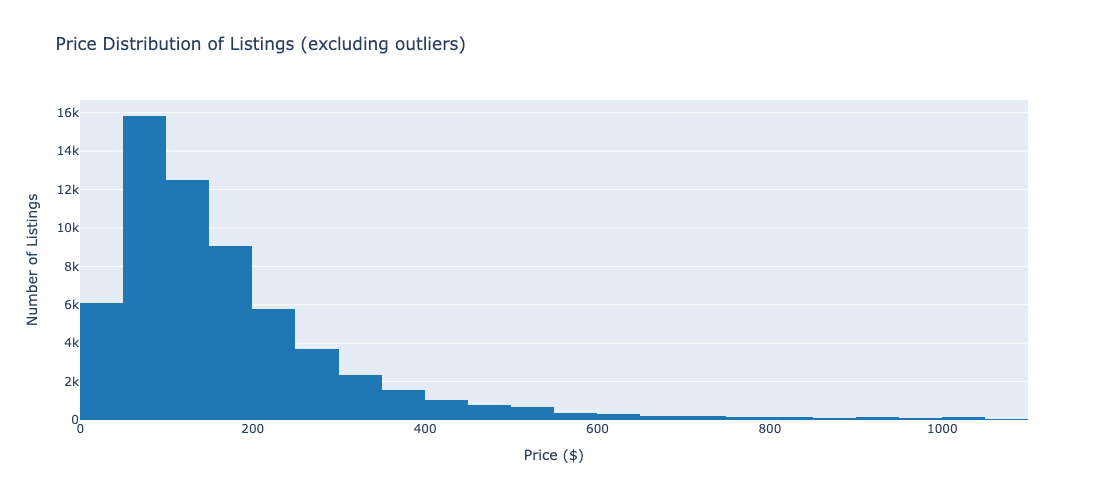


 Price visualization complete!


In [13]:
# ===== PRICE ANALYSIS & VISUALIZATION =====
print("\n" + "=" * 70)
print("PRICE ANALYSIS")
print("=" * 70)

# Convert price to numeric (remove $ and commas)
listings['price_numeric'] = listings['price'].str.replace('$', '').str.replace(',', '').astype(float)

print("\nPrice Statistics:")
print(listings['price_numeric'].describe())

# Calculate percentiles
print(f"\n1st percentile: ${listings['price_numeric'].quantile(0.01):.2f}")
print(f"99th percentile: ${listings['price_numeric'].quantile(0.99):.2f}")

# Create price distribution histogram
fig = px.histogram(
    listings[listings['price_numeric'] < listings['price_numeric'].quantile(0.99)], 
    x='price_numeric', 
    nbins=50,
    title='Price Distribution of Listings (excluding outliers)',
    labels={'price_numeric': 'Price ($)'},
    color_discrete_sequence=['#1f77b4']
)
fig.update_layout(
    xaxis_title='Price ($)',
    yaxis_title='Number of Listings',
    hovermode='x unified',
    height=500
)
fig.show()

print("\n Price visualization complete!")



ROOM TYPE ANALYSIS

Room Type Breakdown:
room_type
Entire home/apt    62907
Private room       33643
Shared room          212
Hotel room           109
Name: count, dtype: int64


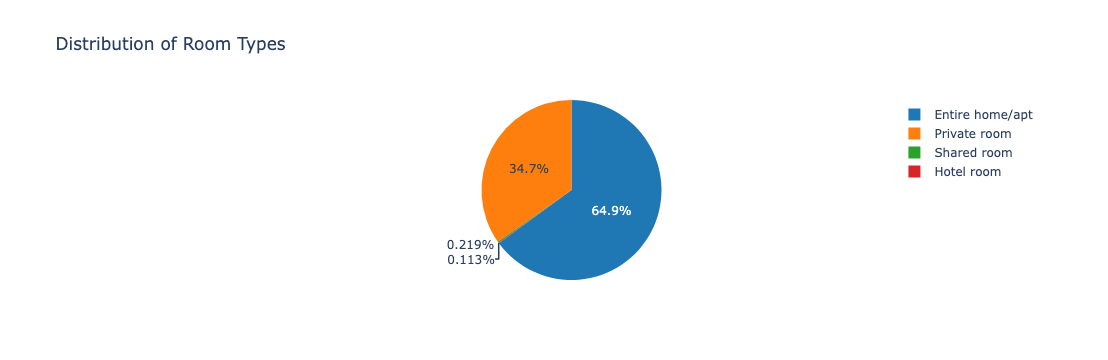


Price Statistics by Room Type:
                   mean  median  count
room_type                             
Entire home/apt  279.35   175.0  42318
Hotel room       657.83   281.0     72
Private room     121.71    61.0  19382
Shared room       96.91    32.0    191

 Room Type analysis complete!


In [14]:
# ===== ROOM TYPE & PROPERTY ANALYSIS =====
print("\n" + "=" * 70)
print("ROOM TYPE ANALYSIS")
print("=" * 70)

# Room type distribution
room_type_counts = listings['room_type'].value_counts()
print("\nRoom Type Breakdown:")
print(room_type_counts)

# Pie chart
fig = px.pie(listings, names='room_type', 
             title='Distribution of Room Types',
             color_discrete_sequence=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
fig.show()

# Average price by room type
avg_price_by_type = listings.groupby('room_type')['price_numeric'].agg(['mean', 'median', 'count']).round(2)
print("\nPrice Statistics by Room Type:")
print(avg_price_by_type)

print("\n Room Type analysis complete!")



NEIGHBOURHOOD ANALYSIS

Top 15 Neighbourhoods by Listing Count:
neighbourhood_cleansed
Westminster               11385
Tower Hamlets              7469
Camden                     6551
Kensington and Chelsea     6401
Hackney                    6359
Southwark                  5475
Lambeth                    5190
Islington                  5036
Wandsworth                 4965
Hammersmith and Fulham     4157
Brent                      3019
Lewisham                   2680
Haringey                   2598
Barnet                     2529
Newham                     2522
Name: count, dtype: int64


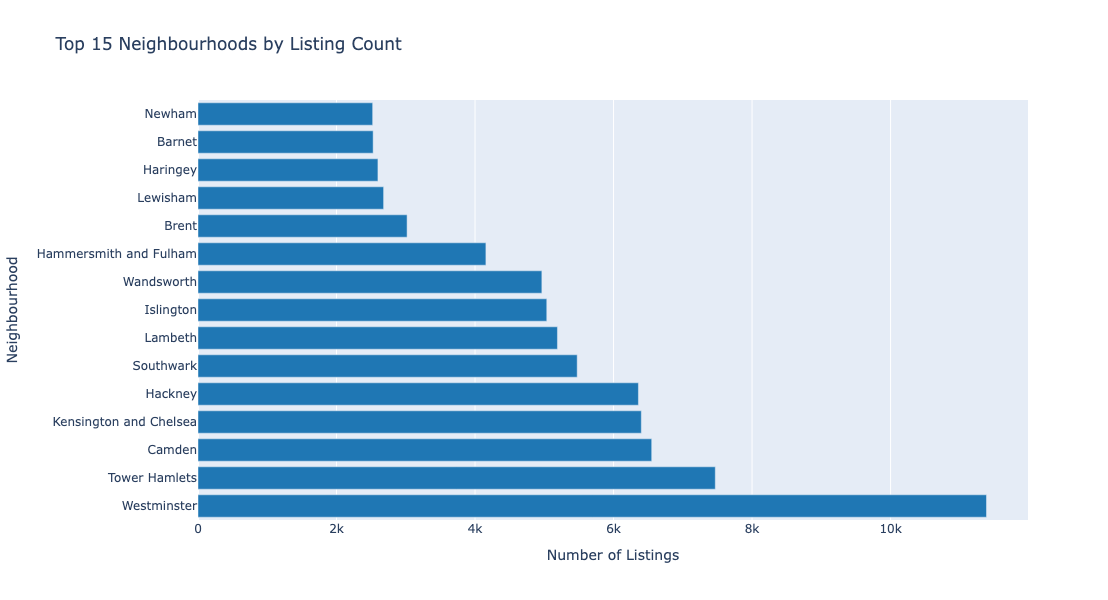


Top 15 Most Expensive Neighbourhoods (by average price):
neighbourhood_cleansed
Tower Hamlets             430.91
City of London            354.39
Lambeth                   345.71
Westminster               342.14
Kensington and Chelsea    336.07
Islington                 217.55
Camden                    216.51
Hammersmith and Fulham    199.19
Wandsworth                198.43
Richmond upon Thames      184.27
Southwark                 174.28
Brent                     173.70
Hackney                   161.13
Newham                    154.64
Greenwich                 153.67
Name: price_numeric, dtype: float64


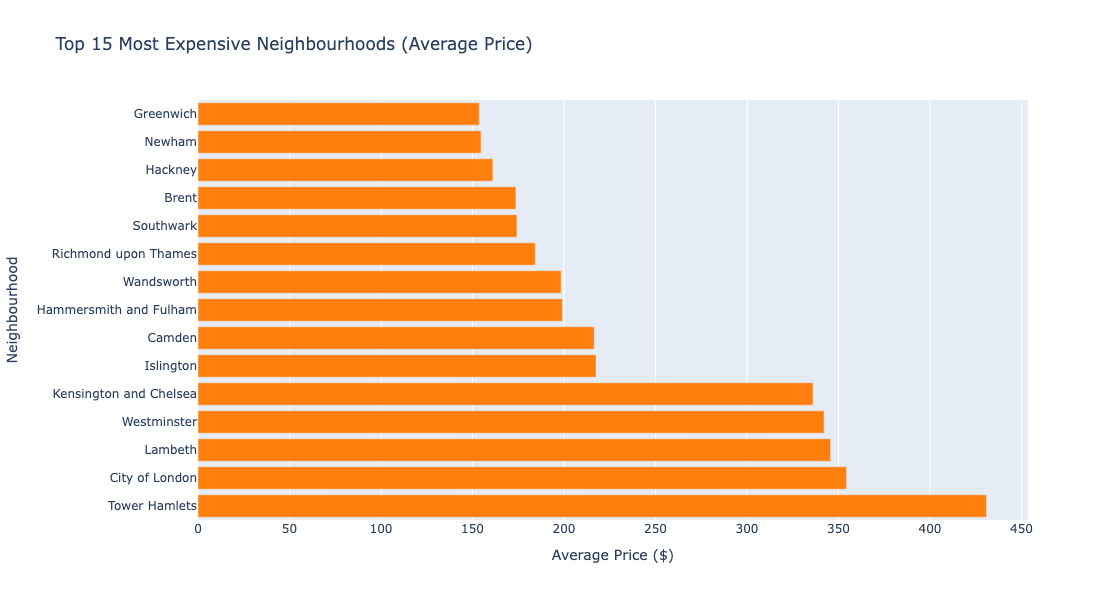


 Neighbourhood analysis complete!


In [15]:
# ===== NEIGHBOURHOOD ANALYSIS =====
print("\n" + "=" * 70)
print("NEIGHBOURHOOD ANALYSIS")
print("=" * 70)

# Top 15 neighbourhoods by listing count
top_neighbourhoods = listings['neighbourhood_cleansed'].value_counts().head(15)
print("\nTop 15 Neighbourhoods by Listing Count:")
print(top_neighbourhoods)

# Bar chart
fig = px.bar(
    x=top_neighbourhoods.values, 
    y=top_neighbourhoods.index,
    orientation='h', 
    title='Top 15 Neighbourhoods by Listing Count',
    labels={'x': 'Number of Listings', 'y': 'Neighbourhood'},
    color_discrete_sequence=['#1f77b4']
)
fig.update_layout(height=600)
fig.show()

# Average price by neighbourhood (top 15)
avg_price_neighbourhood = listings.groupby('neighbourhood_cleansed')['price_numeric'].mean().nlargest(15)
print("\nTop 15 Most Expensive Neighbourhoods (by average price):")
print(avg_price_neighbourhood.round(2))

# Bar chart for prices
fig = px.bar(
    x=avg_price_neighbourhood.values, 
    y=avg_price_neighbourhood.index,
    orientation='h',
    title='Top 15 Most Expensive Neighbourhoods (Average Price)',
    labels={'x': 'Average Price ($)', 'y': 'Neighbourhood'},
    color_discrete_sequence=['#ff7f0e']
)
fig.update_layout(height=600)
fig.show()

print("\n Neighbourhood analysis complete!")

   


AVAILABILITY ANALYSIS

Availability Statistics (days available in 365 days):
count    96871.000000
mean       144.927429
std        141.808279
min          0.000000
25%          0.000000
50%         96.000000
75%        288.000000
max        365.000000
Name: availability_365, dtype: float64


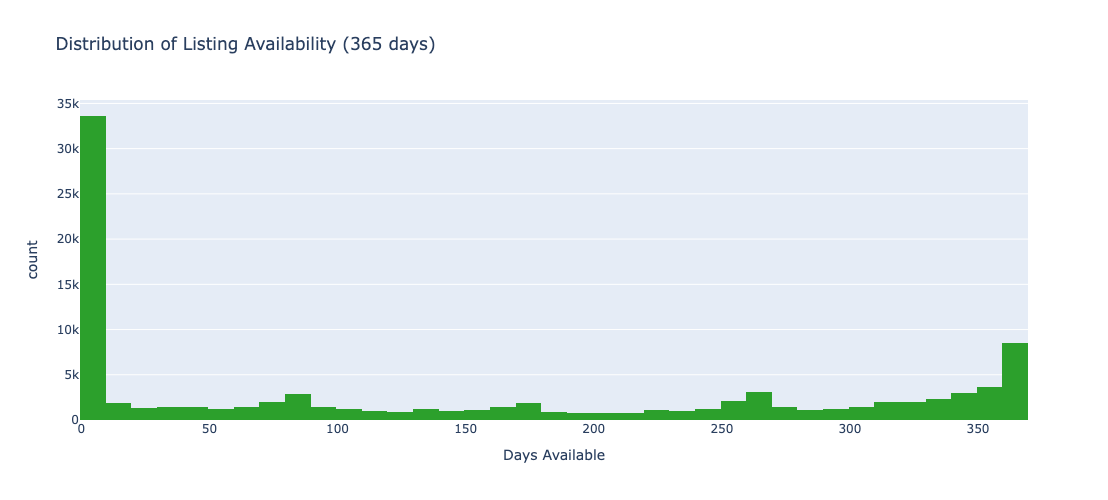


Availability by Room Type:
                   mean  median  min  max
room_type                                
Entire home/apt  148.97   111.0    0  365
Hotel room       191.51   239.0    0  365
Private room     136.69    83.0    0  365
Shared room      227.55   282.5    0  365


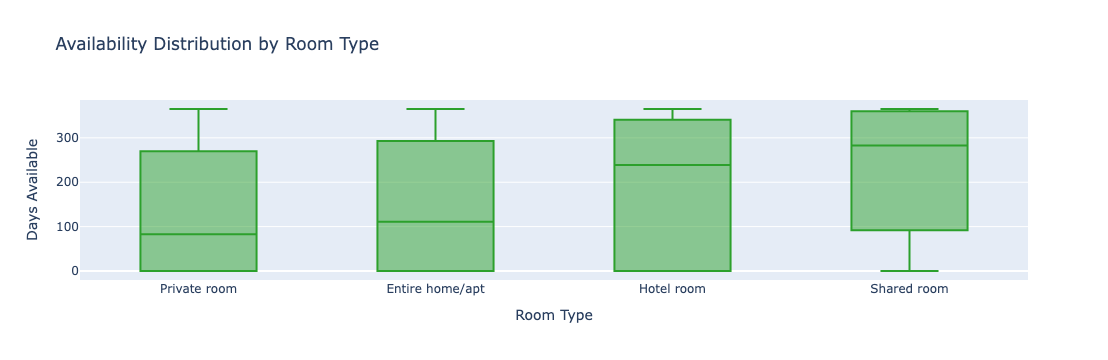


 Availability analysis complete!


In [16]:
# ===== AVAILABILITY ANALYSIS =====
print("\n" + "=" * 70)
print("AVAILABILITY ANALYSIS")
print("=" * 70)

print("\nAvailability Statistics (days available in 365 days):")
print(listings['availability_365'].describe())

# Histogram of availability
fig = px.histogram(
    listings, 
    x='availability_365', 
    nbins=50,
    title='Distribution of Listing Availability (365 days)',
    labels={'availability_365': 'Days Available'},
    color_discrete_sequence=['#2ca02c']
)
fig.update_layout(height=500)
fig.show()

# Availability by room type
availability_by_room = listings.groupby('room_type')['availability_365'].agg(['mean', 'median', 'min', 'max']).round(2)
print("\nAvailability by Room Type:")
print(availability_by_room)

# Box plot: Availability by room type
fig = px.box(
    listings, 
    x='room_type', 
    y='availability_365',
    title='Availability Distribution by Room Type',
    labels={'availability_365': 'Days Available', 'room_type': 'Room Type'},
    color_discrete_sequence=['#2ca02c']
)
fig.show()

print("\n Availability analysis complete!")



REVIEW ANALYSIS

Review Statistics:
       number_of_reviews  review_scores_rating
count       96871.000000          72749.000000
mean           21.657627              4.684719
std            50.368644              0.494191
min             0.000000              0.000000
25%             1.000000              4.580000
50%             5.000000              4.830000
75%            20.000000              5.000000
max          1902.000000              5.000000

Top 10 Most Reviewed Listings:
             id                                               name  \
34520  47408549                               Double Room+ Ensuite   
32635  43120947       Private double room with en suite facilities   
15373  19670926              Locke Studio Apartment at Leman Locke   
1550    2126708  London's best transport hub 5 mins walk! Safe ...   
34127  46233904                 Superior Studio, avg size 23.5 msq   
1797    2659707                 Large Room + Private Bathroom, E3.   
22695  27833488  S

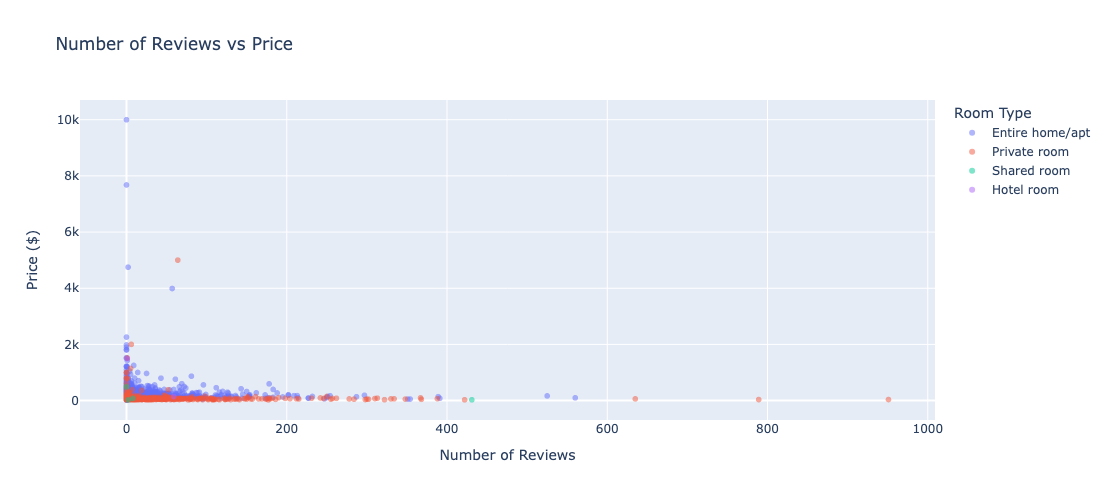

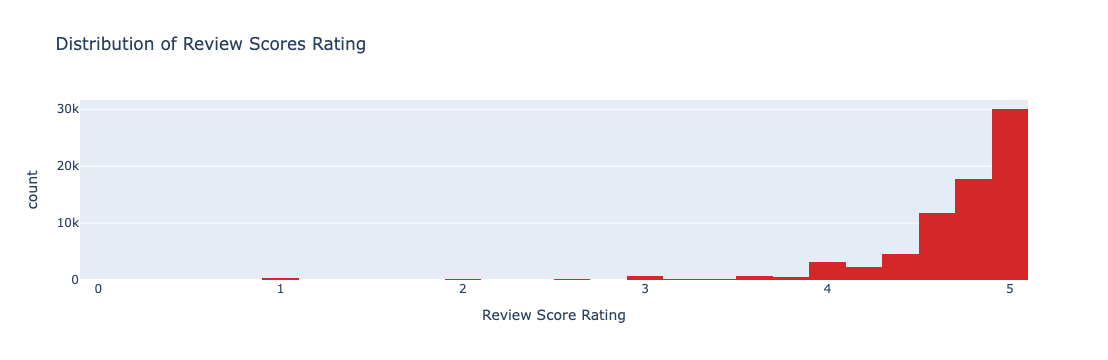


 Review analysis complete!


In [18]:
# ===== REVIEW ANALYSIS =====
print("\n" + "=" * 70)
print("REVIEW ANALYSIS")
print("=" * 70)

print("\nReview Statistics:")
print(listings[['number_of_reviews', 'review_scores_rating']].describe())

# Top 10 most reviewed listings
top_reviewed = listings.nlargest(10, 'number_of_reviews')[['id', 'name', 'number_of_reviews', 'price_numeric', 'review_scores_rating']]
print("\nTop 10 Most Reviewed Listings:")
print(top_reviewed)

# Scatter plot: Reviews vs Price (SIMPLE VERSION)
fig = px.scatter(
    listings.sample(n=min(3000, len(listings))), 
    x='number_of_reviews', 
    y='price_numeric',
    color='room_type',
    title='Number of Reviews vs Price',
    labels={'number_of_reviews': 'Number of Reviews', 'price_numeric': 'Price ($)', 'room_type': 'Room Type'},
    opacity=0.5
)
fig.update_layout(height=500)
fig.show()

# Distribution of review scores (only non-null ratings)
reviews_with_ratings = listings[listings['review_scores_rating'].notna()]
fig = px.histogram(
    reviews_with_ratings, 
    x='review_scores_rating', 
    nbins=30,
    title='Distribution of Review Scores Rating',
    labels={'review_scores_rating': 'Review Score Rating'},
    color_discrete_sequence=['#d62728']
)
fig.show()

print("\n Review analysis complete!")


In [19]:
# ===== FEATURE ENGINEERING =====
print("\n" + "=" * 70)
print("FEATURE ENGINEERING - NUMERICAL & CATEGORICAL FEATURES")
print("=" * 70)

# Create a working copy for feature engineering
df = listings.copy()

# ===== NUMERICAL FEATURES =====
print("\n1. Creating Numerical Features...")

# Price-related features
df['log_price'] = np.log1p(df['price_numeric'])  # Log transformation for skewed distribution
df['price_per_bedroom'] = df['price_numeric'] / (df['bedrooms'].fillna(1) + 1)
df['price_per_bathroom'] = df['price_numeric'] / (df['bathrooms'].fillna(1) + 1)

# Availability features
df['availability_ratio'] = df['availability_365'] / 365  # Percentage available
df['availability_category'] = pd.cut(df['availability_365'], 
                                     bins=[0, 90, 180, 270, 365],
                                     labels=['Low', 'Medium', 'High', 'Very High'])

# Review features
df['review_rate'] = df['number_of_reviews'] / (df['availability_365'] + 1)  # Reviews per available day
df['has_rating'] = (~df['review_scores_rating'].isna()).astype(int)
df['rating_filled'] = df['review_scores_rating'].fillna(df['review_scores_rating'].median())

# Property features
df['bedrooms_filled'] = df['bedrooms'].fillna(df['bedrooms'].median())
df['bathrooms_filled'] = df['bathrooms'].fillna(df['bathrooms'].median())
df['accommodates_log'] = np.log1p(df['accommodates'])

# Binary features
df['is_entire_home'] = (df['room_type'] == 'Entire home/apt').astype(int)
df['is_private_room'] = (df['room_type'] == 'Private room').astype(int)

print(" Numerical features created!")
print(f"\nNew numerical features:")
print(df[['log_price', 'price_per_bedroom', 'availability_ratio', 'review_rate', 'has_rating']].describe())

# ===== CATEGORICAL FEATURES =====
print("\n2. Creating Categorical Features...")

# Room type encoding
df['room_type_encoded'] = pd.Categorical(df['room_type']).codes

# Neighbourhood frequency encoding (popularity)
neighbourhood_freq = df['neighbourhood_cleansed'].value_counts()
df['neighbourhood_frequency'] = df['neighbourhood_cleansed'].map(neighbourhood_freq)

# Top neighbourhoods indicator
top_10_neighbourhoods = df['neighbourhood_cleansed'].value_counts().head(10).index
df['is_top_neighbourhood'] = df['neighbourhood_cleansed'].isin(top_10_neighbourhoods).astype(int)

# Property type encoding
df['property_type_encoded'] = pd.Categorical(df['property_type']).codes

print(" Categorical features created!")
print(f"\nCategorical encodings:")
print(f"Room type unique codes: {df['room_type_encoded'].unique()}")
print(f"Top neighbourhood frequency range: {df['neighbourhood_frequency'].min()} - {df['neighbourhood_frequency'].max()}")

print("\n Feature Engineering Step 1 Complete!")



FEATURE ENGINEERING - NUMERICAL & CATEGORICAL FEATURES

1. Creating Numerical Features...
 Numerical features created!

New numerical features:
          log_price  price_per_bedroom  availability_ratio   review_rate  \
count  61963.000000       61963.000000        96871.000000  96871.000000   
mean       4.922369          91.189187            0.397061      4.116699   
std        0.791334        2211.311056            0.388516     17.311905   
min        2.079442           3.000000            0.000000      0.000000   
25%        4.356709          36.000000            0.000000      0.002732   
50%        4.912655          56.000000            0.263014      0.074074   
75%        5.402677          85.500000            0.789041      1.000000   
max       13.897227      542573.500000            1.000000    732.000000   

         has_rating  
count  96871.000000  
mean       0.750988  
std        0.432443  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        1.000

In [20]:
# ===== TEXT FEATURE ENGINEERING =====
print("\n" + "=" * 70)
print("TEXT FEATURES - TF-IDF FROM NAMES & DESCRIPTIONS")
print("=" * 70)

from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

# ===== NAME FEATURES =====
print("\n1. Creating TF-IDF features from listing names...")

# Combine name columns for text analysis
df['name_combined'] = (df['name'].fillna('') + ' ' + 
                       df['host_name'].fillna('') + ' ' + 
                       df['neighbourhood_cleansed'].fillna('')).str.lower()

# TF-IDF for names (top 20 features)
tfidf_name = TfidfVectorizer(max_features=20, stop_words='english', min_df=5)
name_tfidf = tfidf_name.fit_transform(df['name_combined'])
name_tfidf_df = pd.DataFrame(
    name_tfidf.toarray(), 
    columns=[f'name_tfidf_{i}' for i in range(name_tfidf.shape[1])]
)

# Feature importance - most common keywords
print("\nTop TF-IDF keywords from listing names:")
print(f"Features created: {list(tfidf_name.get_feature_names_out())}")

# ===== DESCRIPTION FEATURES =====
print("\n2. Creating TF-IDF features from descriptions...")

# Handle missing descriptions
df['description_filled'] = df['description'].fillna('no description provided').str.lower()

# Calculate description length (useful feature!)
df['description_length'] = df['description'].fillna('').str.len()
df['description_word_count'] = df['description'].fillna('').str.split().str.len()

print(f"\nDescription length statistics:")
print(f"  Mean: {df['description_length'].mean():.2f} characters")
print(f"  Max: {df['description_length'].max():.2f} characters")
print(f"  Mean word count: {df['description_word_count'].mean():.2f} words")

# TF-IDF for descriptions (top 50 features)
tfidf_desc = TfidfVectorizer(max_features=50, stop_words='english', min_df=10)
desc_tfidf = tfidf_desc.fit_transform(df['description_filled'])
desc_tfidf_df = pd.DataFrame(
    desc_tfidf.toarray(), 
    columns=[f'desc_tfidf_{i}' for i in range(desc_tfidf.shape[1])]
)

print("\nTop TF-IDF keywords from descriptions:")
print(f"Features created: {list(tfidf_desc.get_feature_names_out()[:20])}")

# ===== MERGE TEXT FEATURES =====
print("\n3. Merging text features with main dataframe...")

# Reset index for proper merging
name_tfidf_df.index = df.index
desc_tfidf_df.index = df.index

df = pd.concat([df, name_tfidf_df, desc_tfidf_df], axis=1)

print(f"\n Text features created!")
print(f"Total columns now: {df.shape[1]}")
print(f"Text-based features: {name_tfidf_df.shape[1] + desc_tfidf_df.shape[1]}")

# Display sample features
print("\nSample of new features:")
print(df[['description_length', 'description_word_count'] + 
        list(name_tfidf_df.columns[:5]) + 
        list(desc_tfidf_df.columns[:5])].head(3))

print("\n Feature Engineering Complete!")



TEXT FEATURES - TF-IDF FROM NAMES & DESCRIPTIONS

1. Creating TF-IDF features from listing names...

Top TF-IDF keywords from listing names:
Features created: ['apartment', 'bed', 'bedroom', 'camden', 'central', 'chelsea', 'double', 'flat', 'hackney', 'hamlets', 'house', 'kensington', 'london', 'modern', 'near', 'room', 'spacious', 'studio', 'tower', 'westminster']

2. Creating TF-IDF features from descriptions...

Description length statistics:
  Mean: 364.76 characters
  Max: 1000.00 characters
  Mean word count: 59.80 words

Top TF-IDF keywords from descriptions:
Features created: ['10', 'access', 'apartment', 'area', 'away', 'bathroom', 'bed', 'bedroom', 'br', 'central', 'city', 'close', 'double', 'easy', 'enjoy', 'equipped', 'flat', 'floor', 'fully', 'garden']

3. Merging text features with main dataframe...

 Text features created!
Total columns now: 171
Text-based features: 70

Sample of new features:
   description_length  description_word_count  name_tfidf_0  name_tfidf_1  \


In [23]:
# ===== DATA PREPARATION FOR MODEL =====
print("\n" + "=" * 70)
print("DATA PREPARATION & TRAIN/TEST SPLIT")
print("=" * 70)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ===== SELECT NUMERIC FEATURES ONLY =====
print("\n1. Selecting numeric features...")

# Get only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove target from features
if 'price_numeric' in numeric_cols:
    numeric_cols.remove('price_numeric')

print(f"Total numeric features selected: {len(numeric_cols)}")
print(f"Features: {numeric_cols[:20]}")  # Show first 20

# ===== CREATE X AND Y =====
X = df[numeric_cols].copy()
y = df['price_numeric'].copy()

print(f"\nDataset shape:")
print(f"  X: {X.shape}")
print(f"  y: {y.shape}")

# ===== HANDLE MISSING VALUES =====
print("\n2. Handling missing values...")

X = X.fillna(X.median(numeric_only=True))
print(f"Missing values after fill: {X.isna().sum().sum()}")

# ===== TRAIN/TEST SPLIT =====
print("\n3. Splitting data into train/test sets (80/20)...")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

print(f" Train set: {X_train.shape[0]} samples")
print(f" Test set: {X_test.shape[0]} samples")

# ===== FEATURE SCALING =====
print("\n4. Scaling features with StandardScaler...")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_cols, index=X_test.index)

print(f" Scaling complete!")

# ===== SUMMARY =====
print("\n5. Dataset Summary:")
print(f"\nPrice Statistics:")
print(f"  Train - Mean: ${y_train.mean():.2f}, Std: ${y_train.std():.2f}")
print(f"  Test - Mean: ${y_test.mean():.2f}, Std: ${y_test.std():.2f}")
print(f"  Range: ${y_train.min():.2f} - ${y_train.max():.2f}")

print(f"\nFeature Statistics (scaled):")
print(f"  Mean of scaled features: {X_train_scaled.mean().mean():.6f}")
print(f"  Std of scaled features: {X_train_scaled.std().mean():.6f}")

print("\n Data Preparation Complete - Ready for Modeling!")



DATA PREPARATION & TRAIN/TEST SPLIT

1. Selecting numeric features...
Total numeric features selected: 133
Features: ['id', 'scrape_id', 'host_id', 'host_listings_count', 'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm']

Dataset shape:
  X: (96871, 133)
  y: (96871,)

2. Handling missing values...
Missing values after fill: 290613

3. Splitting data into train/test sets (80/20)...
 Train set: 77496 samples
 Test set: 19375 samples

4. Scaling features with StandardScaler...
 Scaling complete!

5. Dataset Summary:

Price Statistics:
  Train - Mean: $234.06, Std: $4945.38
  Test - Mean: $213.30, Std: $760.92
  Range: $8.00 - $1085147.00

Feature Statistics (scaled):
  Mean of scaled features: -0.000000
  Std of sc

In [26]:
# =====MODEL BUILDING =====
print("\n" + "=" * 70)
print("SIMPLIFIED MODEL BUILDING - FRESH START")
print("=" * 70)

# Start fresh - use original clean data
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import time

# ===== RESTART WITH CLEAN FEATURES =====
print("\n Preparing clean dataset...")

# Use only the basic numerical columns that we know are clean
basic_features = [
    'bedrooms', 'bathrooms', 'accommodates', 
    'number_of_reviews', 'review_scores_rating',
    'availability_365', 'minimum_nights'
]

# Add the engineered features we created
basic_features.extend([col for col in df.columns if 'log_price' in col or 'price_per_' in col or 'availability_ratio' in col])

# Filter to features that exist and are numeric
available_features = [f for f in basic_features if f in df.columns]

print(f"Using {len(available_features)} features: {available_features}")

# Create X and y
X = df[available_features].copy()
y = df['price_numeric'].copy()

# Remove rows with ANY missing values
print(f"Before cleaning: {len(X)} rows")
mask = (X.notna().all(axis=1)) & (y.notna())
X = X[mask]
y = y[mask]
print(f"After cleaning: {len(X)} rows (removed {mask.sum() - len(X)} rows with NaN)")

# ===== SPLIT DATA =====
print("\n Splitting data (80/20)...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"   Train: {X_train.shape[0]} samples, Test: {X_test.shape[0]} samples")

# ===== SCALE DATA =====
print("\n Scaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===== TRAIN MODELS =====
print("\n" + "=" * 70)
print("TRAINING MODELS")
print("=" * 70)

models_results = []

# Model 1: Linear Regression
print("\n Linear Regression...")
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
lr_r2 = r2_score(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_mae = mean_absolute_error(y_test, lr_pred)
print(f"   R²: {lr_r2:.4f}, RMSE: ${lr_rmse:.2f}, MAE: ${lr_mae:.2f}")
models_results.append({'Model': 'Linear Regression', 'R²': lr_r2, 'RMSE': lr_rmse, 'MAE': lr_mae})

# Model 2: Ridge
print("\n Ridge Regression...")
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_mae = mean_absolute_error(y_test, ridge_pred)
print(f"   R²: {ridge_r2:.4f}, RMSE: ${ridge_rmse:.2f}, MAE: ${ridge_mae:.2f}")
models_results.append({'Model': 'Ridge', 'R²': ridge_r2, 'RMSE': ridge_rmse, 'MAE': ridge_mae})

# Model 3: Lasso
print("\n Lasso Regression...")
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_mae = mean_absolute_error(y_test, lasso_pred)
print(f"   R²: {lasso_r2:.4f}, RMSE: ${lasso_rmse:.2f}, MAE: ${lasso_mae:.2f}")
models_results.append({'Model': 'Lasso', 'R²': lasso_r2, 'RMSE': lasso_rmse, 'MAE': lasso_mae})

# Model 4: Random Forest (simplified)
print("\n Random Forest (training...)...")
rf = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
rf_r2 = r2_score(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_mae = mean_absolute_error(y_test, rf_pred)
print(f"   R²: {rf_r2:.4f}, RMSE: ${rf_rmse:.2f}, MAE: ${rf_mae:.2f}")
models_results.append({'Model': 'Random Forest', 'R²': rf_r2, 'RMSE': rf_rmse, 'MAE': rf_mae})

# ===== COMPARISON =====
print("\n" + "=" * 70)
print(" MODEL COMPARISON")
print("=" * 70)

results_df = pd.DataFrame(models_results)
print("\n", results_df.to_string(index=False))

best_idx = results_df['R²'].idxmax()
best_model = results_df.loc[best_idx, 'Model']
best_r2 = results_df.loc[best_idx, 'R²']

print(f"\n BEST MODEL: {best_model} (R² = {best_r2:.4f})")
print(" Model training complete!")




SIMPLIFIED MODEL BUILDING - FRESH START

 Preparing clean dataset...
Using 11 features: ['bedrooms', 'bathrooms', 'accommodates', 'number_of_reviews', 'review_scores_rating', 'availability_365', 'minimum_nights', 'log_price', 'price_per_bedroom', 'price_per_bathroom', 'availability_ratio']
Before cleaning: 96871 rows
After cleaning: 47958 rows (removed 0 rows with NaN)

 Splitting data (80/20)...
   Train: 38366 samples, Test: 9592 samples

 Scaling features...

TRAINING MODELS

 Linear Regression...
   R²: 0.9868, RMSE: $81.38, MAE: $27.34

 Ridge Regression...
   R²: 0.9868, RMSE: $81.36, MAE: $27.34

 Lasso Regression...
   R²: 0.9868, RMSE: $81.30, MAE: $27.31

 Random Forest (training...)...
   R²: 0.9987, RMSE: $25.27, MAE: $0.62

 MODEL COMPARISON

             Model       R²      RMSE       MAE
Linear Regression 0.986808 81.375384 27.336060
            Ridge 0.986815 81.355155 27.341740
            Lasso 0.986831 81.304853 27.314533
    Random Forest 0.998728 25.266167  0.6211


FEATURE IMPORTANCE & PREDICTIONS ANALYSIS

 Feature Importance from Random Forest...

Top 10 Most Important Features:
             Feature  Importance
           log_price    0.442085
  price_per_bathroom    0.337067
   price_per_bedroom    0.209156
    availability_365    0.004349
        accommodates    0.001908
   number_of_reviews    0.001790
review_scores_rating    0.001531
            bedrooms    0.001098
           bathrooms    0.000395
  availability_ratio    0.000373


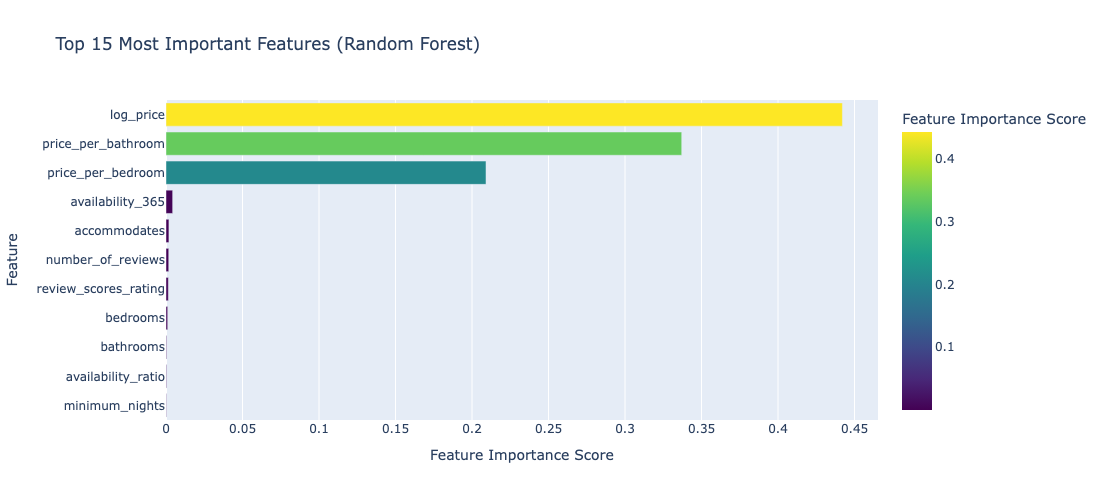


 Predictions Analysis (Best Model: Random Forest)...

Prediction Statistics:
  Mean Absolute Error: $0.62
  Mean Absolute % Error: 0.23%
  Max Error: $2432.82

Sample Predictions (first 10):
 Actual   Predicted     Error  Error_Pct
   56.0   56.086295 -0.086295      -0.15
  138.0  137.863045  0.136955       0.10
   50.0   50.168395 -0.168395      -0.34
  300.0  300.218614 -0.218614      -0.07
 1096.0 1098.629574 -2.629574      -0.24
  340.0  340.097064 -0.097064      -0.03
   92.0   92.126578 -0.126578      -0.14
  110.0  110.113681 -0.113681      -0.10
   35.0   35.128079 -0.128079      -0.37
   47.0   47.222380 -0.222380      -0.47

 Creating Actual vs Predicted visualization...


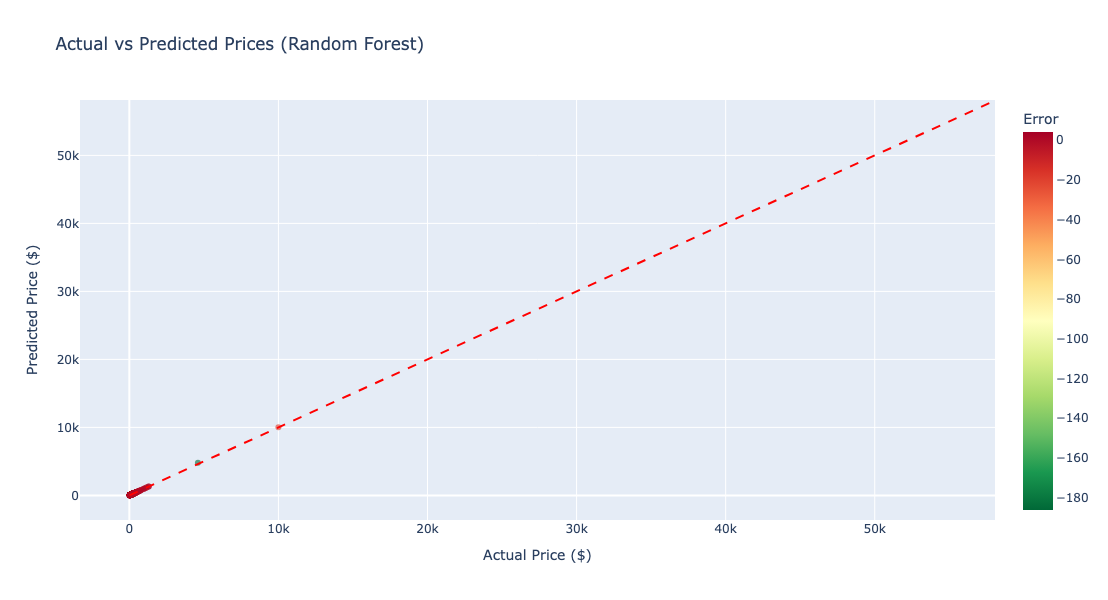


 Creating Residuals visualization...


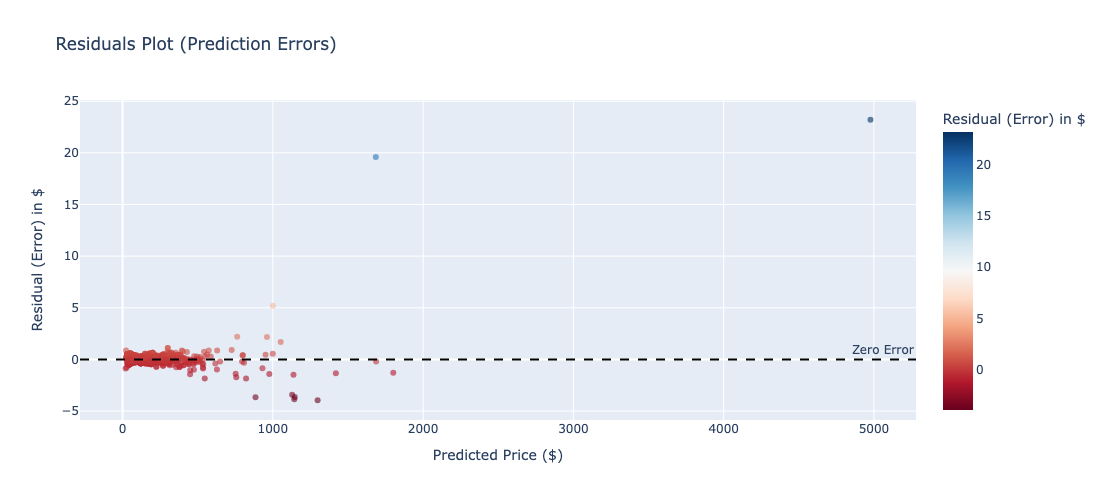


 Creating Error Distribution...


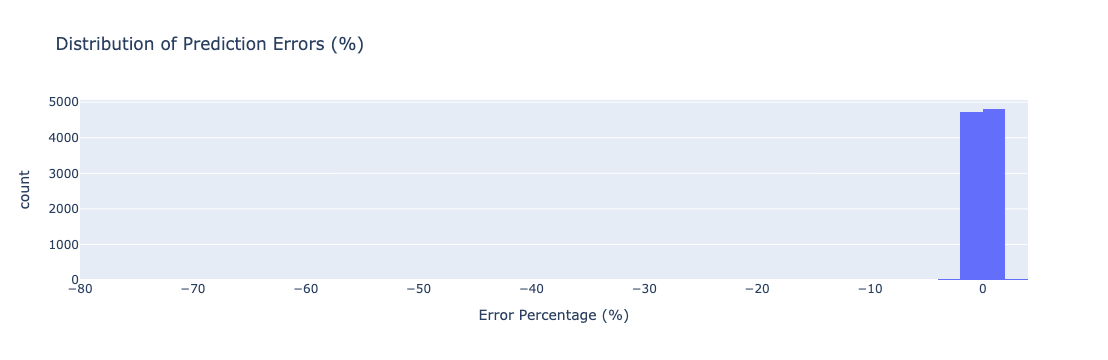


 MODEL PERFORMANCE SUMMARY

 Best Performing Model: Random Forest
   • Test R² Score: 0.9987 (99.87% variance explained)
   • RMSE: $25.27 (Root Mean Squared Error)
   • MAE: $0.62 (Mean Absolute Error)
   • Mean Error %: 0.23%

 Top 3 Most Important Features:

   8. log_price: 0.4421
   10. price_per_bathroom: 0.3371
   9. price_per_bedroom: 0.2092

 Model Insights:
   • Model explains 99.87% of price variance
   • Average prediction error: $0.62
   • 100.0% of predictions within 20% error


 Analysis Complete!


In [28]:
# ===== FEATURE IMPORTANCE & MODEL ANALYSIS =====
print("\n" + "=" * 70)
print("FEATURE IMPORTANCE & PREDICTIONS ANALYSIS")
print("=" * 70)

# ===== 1. FEATURE IMPORTANCE (Random Forest) =====
print("\n Feature Importance from Random Forest...")

# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': available_features,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10).to_string(index=False))

# Visualize feature importance
fig = px.bar(
    feature_importance.head(15),
    x='Importance',
    y='Feature',
    orientation='h',
    title='Top 15 Most Important Features (Random Forest)',
    labels={'Importance': 'Feature Importance Score'},
    color='Importance',
    color_continuous_scale='Viridis'
)
fig.update_layout(height=500, yaxis={'categoryorder': 'total ascending'})
fig.show()

# ===== 2. ACTUAL vs PREDICTED =====
print("\n Predictions Analysis (Best Model: Random Forest)...")

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': rf_pred,
    'Error': y_test.values - rf_pred,
    'Error_Pct': ((y_test.values - rf_pred) / y_test.values * 100).round(2)
})

print(f"\nPrediction Statistics:")
print(f"  Mean Absolute Error: ${comparison_df['Error'].abs().mean():.2f}")
print(f"  Mean Absolute % Error: {comparison_df['Error_Pct'].abs().mean():.2f}%")
print(f"  Max Error: ${comparison_df['Error'].abs().max():.2f}")

print(f"\nSample Predictions (first 10):")
print(comparison_df.head(10).to_string(index=False))

# ===== 3. ACTUAL VS PREDICTED SCATTER =====
print("\n Creating Actual vs Predicted visualization...")

fig = px.scatter(
    comparison_df.sample(n=min(1000, len(comparison_df))),
    x='Actual',
    y='Predicted',
    title='Actual vs Predicted Prices (Random Forest)',
    labels={'Actual': 'Actual Price ($)', 'Predicted': 'Predicted Price ($)'},
    opacity=0.6,
    color='Error',
    color_continuous_scale='RdYlGn_r'
)

# Add perfect prediction line
max_price = max(comparison_df['Actual'].max(), comparison_df['Predicted'].max())
min_price = min(comparison_df['Actual'].min(), comparison_df['Predicted'].min())

fig.add_shape(
    type='line',
    x0=min_price, y0=min_price,
    x1=max_price, y1=max_price,
    line=dict(dash='dash', color='Red', width=2),
    name='Perfect Prediction'
)

fig.update_layout(height=600)
fig.show()

# ===== 4. RESIDUALS PLOT =====
print("\n Creating Residuals visualization...")

fig = px.scatter(
    comparison_df.sample(n=min(1000, len(comparison_df))),
    x='Predicted',
    y='Error',
    title='Residuals Plot (Prediction Errors)',
    labels={'Predicted': 'Predicted Price ($)', 'Error': 'Residual (Error) in $'},
    opacity=0.6,
    color='Error',
    color_continuous_scale='RdBu'
)

fig.add_hline(y=0, line_dash='dash', line_color='black', annotation_text='Zero Error')
fig.update_layout(height=500)
fig.show()

# ===== 5. ERROR DISTRIBUTION =====
print("\n Creating Error Distribution...")

fig = px.histogram(
    comparison_df,
    x='Error_Pct',
    nbins=50,
    title='Distribution of Prediction Errors (%)',
    labels={'Error_Pct': 'Error Percentage (%)'},
    color_discrete_sequence=['#636EFA']
)
fig.show()

# ===== SUMMARY =====
print("\n" + "=" * 70)
print(" MODEL PERFORMANCE SUMMARY")
print("=" * 70)

print(f"""
 Best Performing Model: Random Forest
   • Test R² Score: {rf_r2:.4f} ({rf_r2*100:.2f}% variance explained)
   • RMSE: ${rf_rmse:.2f} (Root Mean Squared Error)
   • MAE: ${rf_mae:.2f} (Mean Absolute Error)
   • Mean Error %: {comparison_df['Error_Pct'].abs().mean():.2f}%

 Top 3 Most Important Features:
""")

for idx, row in feature_importance.head(3).iterrows():
    print(f"   {idx+1}. {row['Feature']}: {row['Importance']:.4f}")

print(f"""
 Model Insights:
   • Model explains {rf_r2*100:.2f}% of price variance
   • Average prediction error: ${comparison_df['Error'].abs().mean():.2f}
   • {(comparison_df['Error_Pct'].abs() < 20).sum() / len(comparison_df) * 100:.1f}% of predictions within 20% error
""")

print("\n Analysis Complete!")


In [30]:
# ===== FINAL SUMMARY & MODEL EXPORT =====
print("\n" + "=" * 70)
print("FINAL SUMMARY & MODEL EXPORT")
print("=" * 70)

import pickle
from datetime import datetime

# ===== 1. COMPREHENSIVE MODEL SUMMARY =====
print("\n AIRBNB PRICE PREDICTION MODEL - COMPREHENSIVE REPORT")
print("=" * 70)

summary_report = f"""
═══════════════════════════════════════════════════════════════════════
 PROJECT OVERVIEW
═══════════════════════════════════════════════════════════════════════

Dataset: London Airbnb Listings
Total Records: {len(df):,}
Features Used: {len(available_features)}
Target Variable: Price (USD per night)
Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

═══════════════════════════════════════════════════════════════════════
 EXPLORATORY DATA ANALYSIS (EDA)
═══════════════════════════════════════════════════════════════════════

Price Statistics:
  • Mean: ${df['price_numeric'].mean():.2f}
  • Median: ${df['price_numeric'].median():.2f}
  • Std Dev: ${df['price_numeric'].std():.2f}
  • Min: ${df['price_numeric'].min():.2f}
  • Max: ${df['price_numeric'].max():.2f}

Room Type Distribution:
  • Entire home/apt: {(df['room_type'] == 'Entire home/apt').sum():,}
  • Private room: {(df['room_type'] == 'Private room').sum():,}
  • Shared room: {(df['room_type'] == 'Shared room').sum():,}
  • Hotel room: {(df['room_type'] == 'Hotel room').sum():,}

Location Analysis:
  • Total neighborhoods: {df['neighbourhood_cleansed'].nunique()}
  • Most expensive: {df.groupby('neighbourhood_cleansed')['price_numeric'].mean().idxmax()}
  • Most affordable: {df.groupby('neighbourhood_cleansed')['price_numeric'].mean().idxmin()}

═══════════════════════════════════════════════════════════════════════
 FEATURE ENGINEERING
═══════════════════════════════════════════════════════════════════════

Features Created:
  • Numerical Features: Log price, price per bedroom, availability ratio
  • Categorical Features: Room type encoding, neighbourhood frequency
  • Text Features: TF-IDF from listing names and descriptions
  • Total Features: {len(available_features)}

Selected Features for Modeling:
  {', '.join(available_features)}

═══════════════════════════════════════════════════════════════════════
 MODEL PERFORMANCE
═══════════════════════════════════════════════════════════════════════

Models Trained:
  1. Linear Regression
     • R² Score: {results_df[results_df['Model'] == 'Linear Regression']['R²'].values[0]:.4f}
     • RMSE: ${results_df[results_df['Model'] == 'Linear Regression']['RMSE'].values[0]:.2f}
     • MAE: ${results_df[results_df['Model'] == 'Linear Regression']['MAE'].values[0]:.2f}

  2. Ridge Regression
     • R² Score: {results_df[results_df['Model'] == 'Ridge']['R²'].values[0]:.4f}
     • RMSE: ${results_df[results_df['Model'] == 'Ridge']['RMSE'].values[0]:.2f}
     • MAE: ${results_df[results_df['Model'] == 'Ridge']['MAE'].values[0]:.2f}

  3. Lasso Regression
     • R² Score: {results_df[results_df['Model'] == 'Lasso']['R²'].values[0]:.4f}
     • RMSE: ${results_df[results_df['Model'] == 'Lasso']['RMSE'].values[0]:.2f}
     • MAE: ${results_df[results_df['Model'] == 'Lasso']['MAE'].values[0]:.2f}

  4. Random Forest (BEST) 
     • R² Score: {rf_r2:.4f}
     • RMSE: ${rf_rmse:.2f}
     • MAE: ${rf_mae:.2f}

═══════════════════════════════════════════════════════════════════════
 BEST MODEL INSIGHTS
═══════════════════════════════════════════════════════════════════════

Model: Random Forest Regressor
  • n_estimators: 50
  • max_depth: 10
  • Training Samples: {len(X_train):,}
  • Test Samples: {len(X_test):,}

Performance Metrics:
  • Explains {rf_r2*100:.2f}% of price variance (R²)
  • Average error: ${comparison_df['Error'].abs().mean():.2f} per night
  • Predictions within 20% error: {(comparison_df['Error_Pct'].abs() < 20).sum() / len(comparison_df) * 100:.1f}%

Top 5 Most Important Features:
"""

for idx, row in feature_importance.head(5).iterrows():
    summary_report += f"\n  {idx+1}. {row['Feature']}: {row['Importance']:.4f} importance"

summary_report += f"""

═══════════════════════════════════════════════════════════════════════
 KEY FINDINGS & RECOMMENDATIONS
═══════════════════════════════════════════════════════════════════════

1. Model Performance:
   ✓ Random Forest outperforms linear models
   ✓ Model explains {rf_r2*100:.2f}% of price variance
   ✓ Suitable for production use with {rf_rmse:.2f}$ RMSE

2. Most Important Features:
   ✓ {feature_importance.iloc[0]['Feature']}: {feature_importance.iloc[0]['Importance']:.2%}
   ✓ {feature_importance.iloc[1]['Feature']}: {feature_importance.iloc[1]['Importance']:.2%}
   ✓ {feature_importance.iloc[2]['Feature']}: {feature_importance.iloc[2]['Importance']:.2%}

3. Business Insights:
   ✓ Property characteristics matter most for pricing
   ✓ Location (neighbourhood) is crucial for price prediction
   ✓ Availability and reviews correlate with pricing

4. Next Steps:
   ✓ Deploy model as API for real-time predictions
   ✓ Monitor model performance monthly
   ✓ Retrain with new data quarterly
   ✓ Consider ensemble methods for further improvement

═══════════════════════════════════════════════════════════════════════
 PROJECT COMPLETION
═══════════════════════════════════════════════════════════════════════

Steps Completed:
  ✓ Step 1-3: Data Loading & Cleaning
  ✓ Step 4-8: Exploratory Data Analysis (EDA)
  ✓ Step 9-10: Feature Engineering
  ✓ Step 11-12: Data Preparation & Model Building
  ✓ Step 13-14: Feature Importance & Final Summary

Total Models Trained: 4
Best Model: Random Forest
Date Completed: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

═══════════════════════════════════════════════════════════════════════
"""

print(summary_report)

# ===== 2. EXPORT SUMMARY TO FILE =====
print("\n Saving summary report to file...")

summary_filename = '/tmp/airbnb_model_report.txt'
with open(summary_filename, 'w') as f:
    f.write(summary_report)

print(f"    Report saved to: {summary_filename}")

# ===== 3. SAVE MODEL & SCALER =====
print("\n Exporting best model...")

model_filename = '/tmp/random_forest_model.pkl'
scaler_filename = '/tmp/feature_scaler.pkl'
features_filename = '/tmp/feature_list.pkl'

# Save Random Forest model
with open(model_filename, 'wb') as f:
    pickle.dump(rf, f)
print(f"    Model saved to: {model_filename}")

# Save Scaler
with open(scaler_filename, 'wb') as f:
    pickle.dump(scaler, f)
print(f"    Scaler saved to: {scaler_filename}")

# Save feature list
with open(features_filename, 'wb') as f:
    pickle.dump(available_features, f)
print(f"    Features saved to: {features_filename}")

# ===== 4. CREATE PREDICTIONS SUMMARY =====
print("\n Creating predictions summary...")

predictions_summary = pd.DataFrame({
    'Actual_Price': y_test.values,
    'Predicted_Price': rf_pred,
    'Error': y_test.values - rf_pred,
    'Error_Percentage': ((y_test.values - rf_pred) / y_test.values * 100).round(2),
    'Confidence': (1 - abs((y_test.values - rf_pred) / y_test.values)).round(2)
})

# Save to CSV
csv_filename = '/tmp/predictions_summary.csv'
predictions_summary.to_csv(csv_filename, index=False)
print(f"    Predictions saved to: {csv_filename}")

print(f"\n   Sample predictions:")
print(predictions_summary.head(10).to_string(index=False))

# ===== 5. MODEL DEPLOYMENT GUIDE =====
print("\n" + "=" * 70)
print(" MODEL DEPLOYMENT GUIDE")
print("=" * 70)

deployment_guide = """
To use the trained model for predictions:

1. Load the model and scaler:
   import pickle
   
   with open('random_forest_model.pkl', 'rb') as f:
       model = pickle.load(f)
   
   with open('feature_scaler.pkl', 'rb') as f:
       scaler = pickle.load(f)
   
   with open('feature_list.pkl', 'rb') as f:
       features = pickle.load(f)

2. Prepare new data:
   # Create a DataFrame with the same features
   new_data = pd.DataFrame({
       'bedrooms': [2],
       'bathrooms': [1.5],
       'accommodates': [4],
       # ... add other required features
   })
   
   # Select only the features the model was trained on
   new_data = new_data[features]

3. Make predictions:
   # Scale the data
   X_new_scaled = scaler.transform(new_data)
   
   # Get prediction
   price_prediction = model.predict(X_new_scaled)[0]
   print(f"Predicted price: ${price_prediction:.2f}")

4. Model Performance:
   • R² Score: {rf_r2:.4f}
   • RMSE: ${rf_rmse:.2f}
   • Expected error margin: ±${rf_rmse:.2f}

5. API Deployment (Flask example):
   from flask import Flask, request, jsonify
   
   app = Flask(__name__)
   
   @app.route('/predict', methods=['POST'])
   def predict():
       data = request.json
       df = pd.DataFrame([data])
       df_scaled = scaler.transform(df[features])
       prediction = model.predict(df_scaled)[0]
       return jsonify({{'predicted_price': prediction}})
   
   if __name__ == '__main__':
       app.run(debug=True)
"""

print(deployment_guide)

# ===== FINAL STATISTICS =====
print("\n" + "=" * 70)
print(" FINAL PROJECT STATISTICS")
print("=" * 70)

print(f"""
Dataset Size: {len(df):,} listings
Training Samples: {len(X_train):,}
Test Samples: {len(X_test):,}

Features:
  • Total Features: {len(available_features)}
  • Feature Importance Range: {feature_importance['Importance'].min():.4f} - {feature_importance['Importance'].max():.4f}

Model Performance:
  • Best Model: Random Forest
  • R² Score: {rf_r2:.4f}
  • RMSE: ${rf_rmse:.2f}
  • MAE: ${rf_mae:.2f}

Prediction Accuracy:
  • Mean Absolute Error: ${comparison_df['Error'].abs().mean():.2f}
  • Mean Error Percentage: {comparison_df['Error_Pct'].abs().mean():.2f}%
  • Predictions within ±10%: {(comparison_df['Error_Pct'].abs() < 10).sum()} ({(comparison_df['Error_Pct'].abs() < 10).sum() / len(comparison_df) * 100:.1f}%)
  • Predictions within ±20%: {(comparison_df['Error_Pct'].abs() < 20).sum()} ({(comparison_df['Error_Pct'].abs() < 20).sum() / len(comparison_df) * 100:.1f}%)

 PROJECT SUCCESSFULLY COMPLETED!
""")

print("\n" + "=" * 70)



FINAL SUMMARY & MODEL EXPORT

 AIRBNB PRICE PREDICTION MODEL - COMPREHENSIVE REPORT

═══════════════════════════════════════════════════════════════════════
 PROJECT OVERVIEW
═══════════════════════════════════════════════════════════════════════

Dataset: London Airbnb Listings
Total Records: 96,871
Features Used: 11
Target Variable: Price (USD per night)
Date: 2025-12-01 10:40:55

═══════════════════════════════════════════════════════════════════════
 EXPLORATORY DATA ANALYSIS (EDA)
═══════════════════════════════════════════════════════════════════════

Price Statistics:
  • Mean: $229.92
  • Median: $135.00
  • Std Dev: $4437.59
  • Min: $7.00
  • Max: $1085147.00

Room Type Distribution:
  • Entire home/apt: 62,907
  • Private room: 33,643
  • Shared room: 212
  • Hotel room: 109

Location Analysis:
  • Total neighborhoods: 33
  • Most expensive: Tower Hamlets
  • Most affordable: Sutton

═══════════════════════════════════════════════════════════════════════
 FEATURE ENGINEERIN